 ******************************* Peaks are at: 
 In Arcsec: peaks_A =  [-1  0]
 In Arcsec: peaks_B =  [1 0]

 Pixels: peaks in pixels =  [[-5.0, 0.0], [5.0, 0.0]]
peak_a[0] =  -1
imgcent =  50
************** About to show plots with flux a =  10000000.0 , flux_b =  10000000.0


/Users/m/miniconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


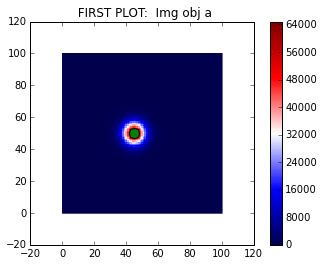

 >>>>>> Plotting img obj a
 image1.array.sum()  9999687.1834
 >>>>>> Plotting img obj b


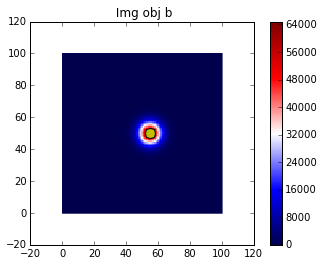

 >>>>>> Plotting imgsum


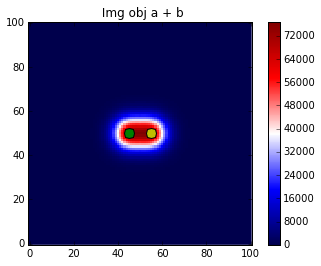

In [1]:
# MSSG, based on JEM and LCA code
# NB version, Start: 12/2015

%matplotlib inline

### Generic imports
import lmfit
import ipdb
import sys
import random
#import triangle
from argparse import ArgumentParser
import matplotlib.pyplot as plt
import numpy as np

### Specific imports
import galsim
import mssg_deblend
import mssg_drawLibrary
from mssg_makeplot import *
from mssg_create_blend import *

################### Initze

#### Level to do printing at (setting it lower will print more stuff)
presetval = 0

plt.rcParams['image.cmap'] = 'seismic'


#################### Drawgal used to be here


############################################################################# Main

# Parse command line args
parser = ArgumentParser()
parser.add_argument("--outfile", default="deblendsOutput/deblendingTests", help="output text filename")
parser.add_argument("--e1a", default=0, type=float, help="e1a in")
parser.add_argument("--e2a", default=0, type=float, help="e2a in")
parser.add_argument("--e1b", default=0, type=float, help="e1b in")
parser.add_argument("--e2b", default=0, type=float, help="e2b in")
parser.add_argument("--plotflag", default=0, type=int, help="Set to 1 to make plots")
parser.add_argument("--centers", default=1, type=int, help="Set to 1 to use exact centers, 2 to use centers from simfit")

args = parser.parse_args("")

########## Get ellips from cmd line
e1ain = args.e1a
e2ain = args.e2a

e1bin = args.e1b
e2bin = args.e2b

plotflag = args.plotflag

centers = args.centers

# ************************************************************************ 4 arcsec sep
# origpeak_a = (-2,0);   origpeak_b = (2,0)    

# ************************************************************************ 2 arcsec sep
origpeak_a = (-1,0);   origpeak_b = (1,0)    

################### Initze
fitdat = []

peak_a =  np.array(origpeak_a) ; peak_b =  np.array(origpeak_b) 
# print " \n\n\n peak_a = ",  peak_a 

########  Convert peaks_pix to pixels
peaks_pix = [[p1/0.2 for p1 in peak_a],  # Div by 0.2 to convert back to pixels
             [p2/0.2 for p2 in peak_b]]

print " ******************************* Peaks are at: "
print " In Arcsec: peaks_A = " , peak_a
print " In Arcsec: peaks_B = " , peak_b

print "\n Pixels: peaks in pixels = " ,  peaks_pix

# print " Pixels: peaks_pix[0] = " ,  peaks_pix[0][0] 

########### Img params
imsize = 101
pixel_scale = 0.2

################## Create the blended obj    
blend, unblends = create_blend(peak_a, peak_b, e1a = e1ain,  e2a = e2ain, e1b = e1bin ,e2b = e2bin, imgsize= imsize, pixelscale = pixel_scale, mrkrsize = 10)

if plotflag > presetval:
    plt.title(" Sanity check: Img blended obj - (a+b) ")
    print " >>>>>> Plotting blend.array - (unblends[0].array + unblends[1].array)  "
    plt.imshow( blend.array - (unblends[0].array + unblends[1].array) , origin='lower',  interpolation='none' );    
    plt.colorbar()
    plt.show()

 


  ************************* About to deblend with these centers: 
 Arcsec: peaks_A =  [-1  0]
 Arcsec: peaks_B =  [1 0]
 Pixels: peaks_pix =  [[-5.0, 0.0], [5.0, 0.0]]
center[0][0] =  45.0
center[0][1] =  50.0
center[1][0] =  55.0
center[1][1] =  50.0
 >>>>>> Plotting   Template obj a 


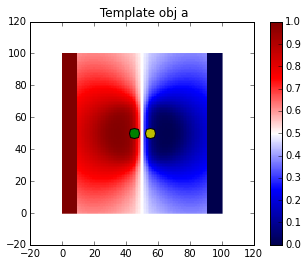

 >>>>>> Plotting   Resid of: (Deblended child a - Unblended img a) 


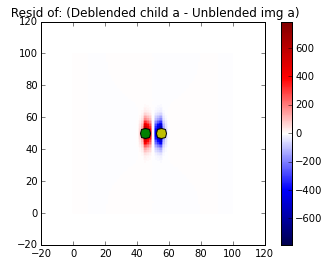

 >>>>>> Plotting   Resid of: (Deblended child a - Unblended img a) / Unblended img a 


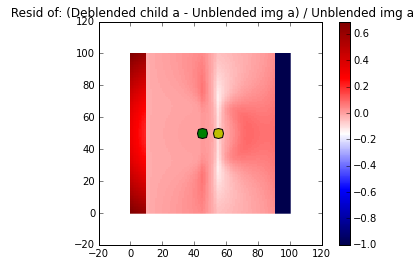

 >>>>>> Plotting   Colorbar = -1 to 1 & Resid of: (Deblended child a - Unblended img a) / Unblended img a 


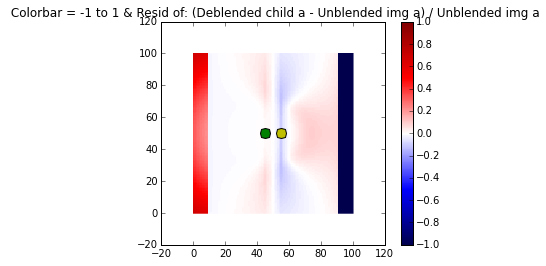

 peakval =  22794.5794483
 >>>>>> Plotting   Resid of: (Deblended child a - Unblended img a) / peak val of a 


/Users/m/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:65: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


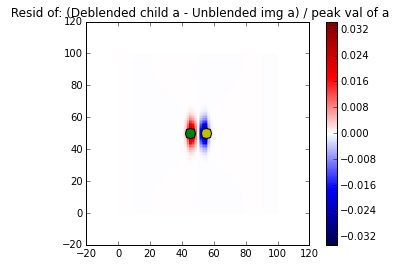

 >>>>>> Plotting   Resid of: (Deblended child b - Unblended img b) 


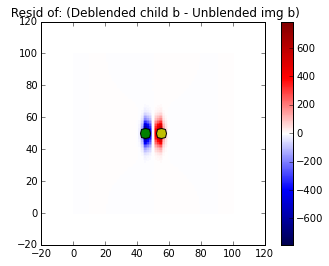

 >>>>>> Plotting   Resid of: (Deblended child b - Unblended img b) /  Unblended img b 


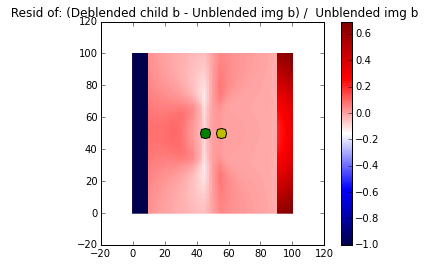

 >>>>>> Plotting   Colorbar = -1 to 1 & Resid of: (Deblended child b - Unblended img b) /  Unblended img b 


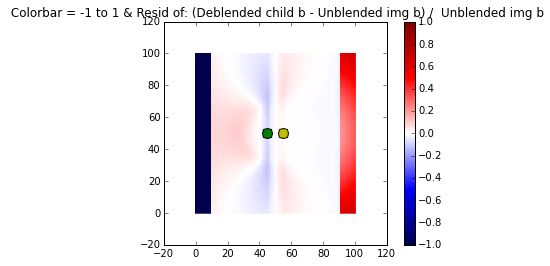

 peakval =  22794.5794483
 >>>>>> Plotting   Resid of: (Deblended child b - Unblended img b) / peak val of b 


/Users/m/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:94: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


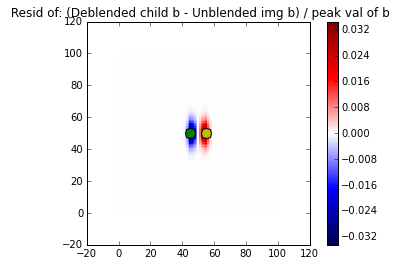

 >>>>>> Plotting   Resid of: (Unblended img b) /  Unblended img b 


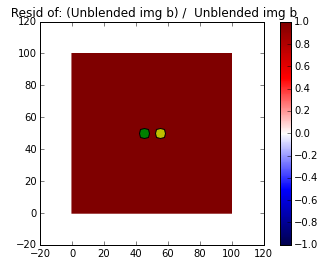

In [2]:

########################## Using actual known peaks, to compare
if centers == 1:
    curpeak_a = origpeak_a ;   curpeak_b = origpeak_b

#    ipdb.set_trace()

#  Convert peaks_pix to pixels
peaks_pix = [[p1/0.2 for p1 in curpeak_a],  # Div by 0.2 to convert back to pixels
                         [p2/0.2 for p2 in curpeak_b]]

print " \n\n\n  ************************* About to deblend with these centers: "   
print " Arcsec: peaks_A = " , peak_a
print " Arcsec: peaks_B = " , peak_b
print " Pixels: peaks_pix = " ,  peaks_pix 

################################################################# Assign to actual peak variable
peak_a =  np.array(curpeak_a) ; peak_b =  np.array(curpeak_b) 
peaks_pix = [[p1/0.2 for p1 in peak_a],  # Div by 0.2 to convert back to pixels
                         [p2/0.2 for p2 in peak_b]]

templates, template_fractions, children = mssg_deblend.deblend(blend.array, peaks_pix, interpolate=False, force_interpolate = False)

##### Needed to plot points at center of imgs
imgsize = imsize
pixelscale = pixel_scale 
imgcent = imgsize/2
acent = (imgcent+peak_a[0]/pixelscale, imgcent+peak_a[1]/pixelscale)
bcent = (imgcent+peak_b[0]/pixelscale, imgcent+peak_b[1]/pixelscale)

center= (acent,bcent)
print "center[0][0] = ",center[0][0]
print "center[0][1] = ",center[0][1]
print "center[1][0] = ",center[1][0]
print "center[1][1] = ",center[1][1] 

########## Plot template
if plotflag > presetval-1:
    pltname = " Template obj a "
    pltcontent = template_fractions[0] 
    makeplot(pltname, pltcontent, centre=center)

######### Plot children
    ### Obj a
    pltname = " Unblended img a ";        pltcontent = unblends[0]
    if plotflag > presetval:
              makeplot(pltname, pltcontent, centre=center)

    pltname = " Deblended img a ";        pltcontent = children[0]
    if plotflag > presetval:
              makeplot(pltname, pltcontent, centre=center)


    pltname = " Resid of: (Deblended child a - Unblended img a) ";        pltcontent = (children[0] - unblends[0].array)
    makeplot(pltname, pltcontent, centre=center)

    # Normalize these        
    pltname = " Resid of: (Deblended child a - Unblended img a) / Unblended img a ";        pltcontent = (children[0] - unblends[0].array)/  unblends[0].array
    makeplot(pltname, pltcontent, centre=center)


    pltname = " Colorbar = -1 to 1 & Resid of: (Deblended child a - Unblended img a) / Unblended img a ";        pltcontent = (children[0] - unblends[0].array)/  unblends[0].array
    makeplot(pltname, pltcontent, centre=center, colorbarlimit=1)

    peakval = unblends[0].array[acent[0], acent[1]]
    print " peakval = ", peakval

    pltname = " Resid of: (Deblended child a - Unblended img a) / peak val of a ";        pltcontent = (children[0] - unblends[0].array)/  peakval
    makeplot(pltname, pltcontent, centre=center)

    pltname = " Resid of: (Unblended img a) / Unblended img a ";        pltcontent = (unblends[0].array)/  unblends[0].array
    if plotflag > presetval:
              makeplot(pltname, pltcontent, centre=center)

    ### Obj b
    pltname = " Unblended img b ";        pltcontent = unblends[1]
    if plotflag > presetval:
              makeplot(pltname, pltcontent, centre=center)

    pltname = " Deblended img b ";        pltcontent = children[1]
    if plotflag > presetval:
              makeplot(pltname, pltcontent, centre=center)

    pltname = " Resid of: (Deblended child b - Unblended img b) ";        pltcontent = children[1] - unblends[1].array 
    makeplot(pltname, pltcontent, centre=center)

    # Normalized
    pltname = " Resid of: (Deblended child b - Unblended img b) /  Unblended img b ";        pltcontent = (children[1] - unblends[1].array ) /  unblends[1].array 
    makeplot(pltname, pltcontent ,  centre=center)

    pltname = " Colorbar = -1 to 1 & Resid of: (Deblended child b - Unblended img b) /  Unblended img b ";        pltcontent = (children[1] - unblends[1].array ) /  unblends[1].array 
    makeplot(pltname, pltcontent , colorbarlimit=1, centre=center)

    peakval = unblends[1].array[bcent[0], bcent[1]]
    print " peakval = ", peakval

    pltname = " Resid of: (Deblended child b - Unblended img b) / peak val of b ";        pltcontent = (children[1] - unblends[1].array)/  peakval
    makeplot(pltname, pltcontent, centre=center)

    pltname = " Resid of: (Unblended img b) /  Unblended img b ";        pltcontent = (unblends[1].array ) / unblends[1].array 
    makeplot(pltname, pltcontent, colorbarlimit=1, centre=center)

